<a href="https://colab.research.google.com/github/akhilganji0812/Predicting-Breast-Tumor-Malignancy-from-Cell-Features/blob/main/Predicting_Breast_Tumor_Malignancy_from_Cell_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [96]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for numerical operations and handling arrays
import numpy as np

# Import matplotlib.pyplot for creating visualizations and plots
import matplotlib.pyplot as plt

# Import seaborn for advanced and attractive statistical data visualization
import seaborn as sb

# Loading Dataset and Displaying Initial Records

In [97]:
# Load the dataset from a CSV file named 'Data.csv' into a pandas DataFrame
data = pd.read_csv('Data.csv')

# Display the first five rows of the DataFrame to get a quick overview of the data
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Getting Dataset Structure and Summary

In [98]:
# Display a concise summary of the DataFrame including:
# - Column names
# - Non-null counts
# - Data types
# - Memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


# Visualizing the Distribution of Tumor Types

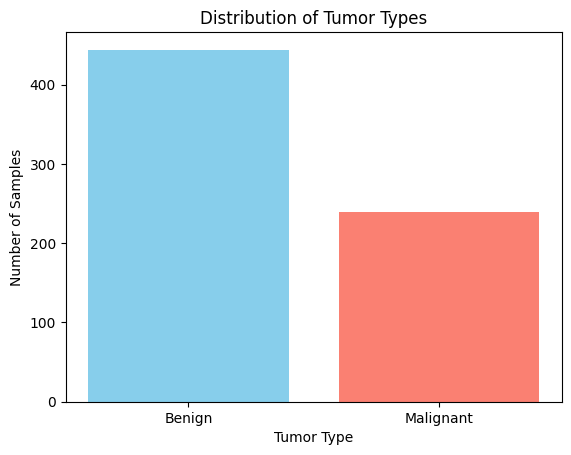

In [99]:
# Extract the target column (assumed to be tumor type) from the DataFrame
q = data.iloc[:, -1].values

# Initialize counters for the two tumor classes
a = 0  # Count for class labeled as 2 (assumed 'Benign')
b = 0  # Count for other class (assumed 'Malignant')

# Iterate through the target values and count occurrences
for i in q:
    if i == 2:
        a += 1
    else:
        b += 1

# Create a bar plot to show the distribution of tumor types
plt.bar(['Benign', 'Malignant'], [a, b], color=['skyblue', 'salmon'])

# Add title and axis labels to enhance readability
plt.title('Distribution of Tumor Types')
plt.xlabel('Tumor Type')
plt.ylabel('Number of Samples')

# Display the plot
plt.show()

# Visualizing Relationships Between Features

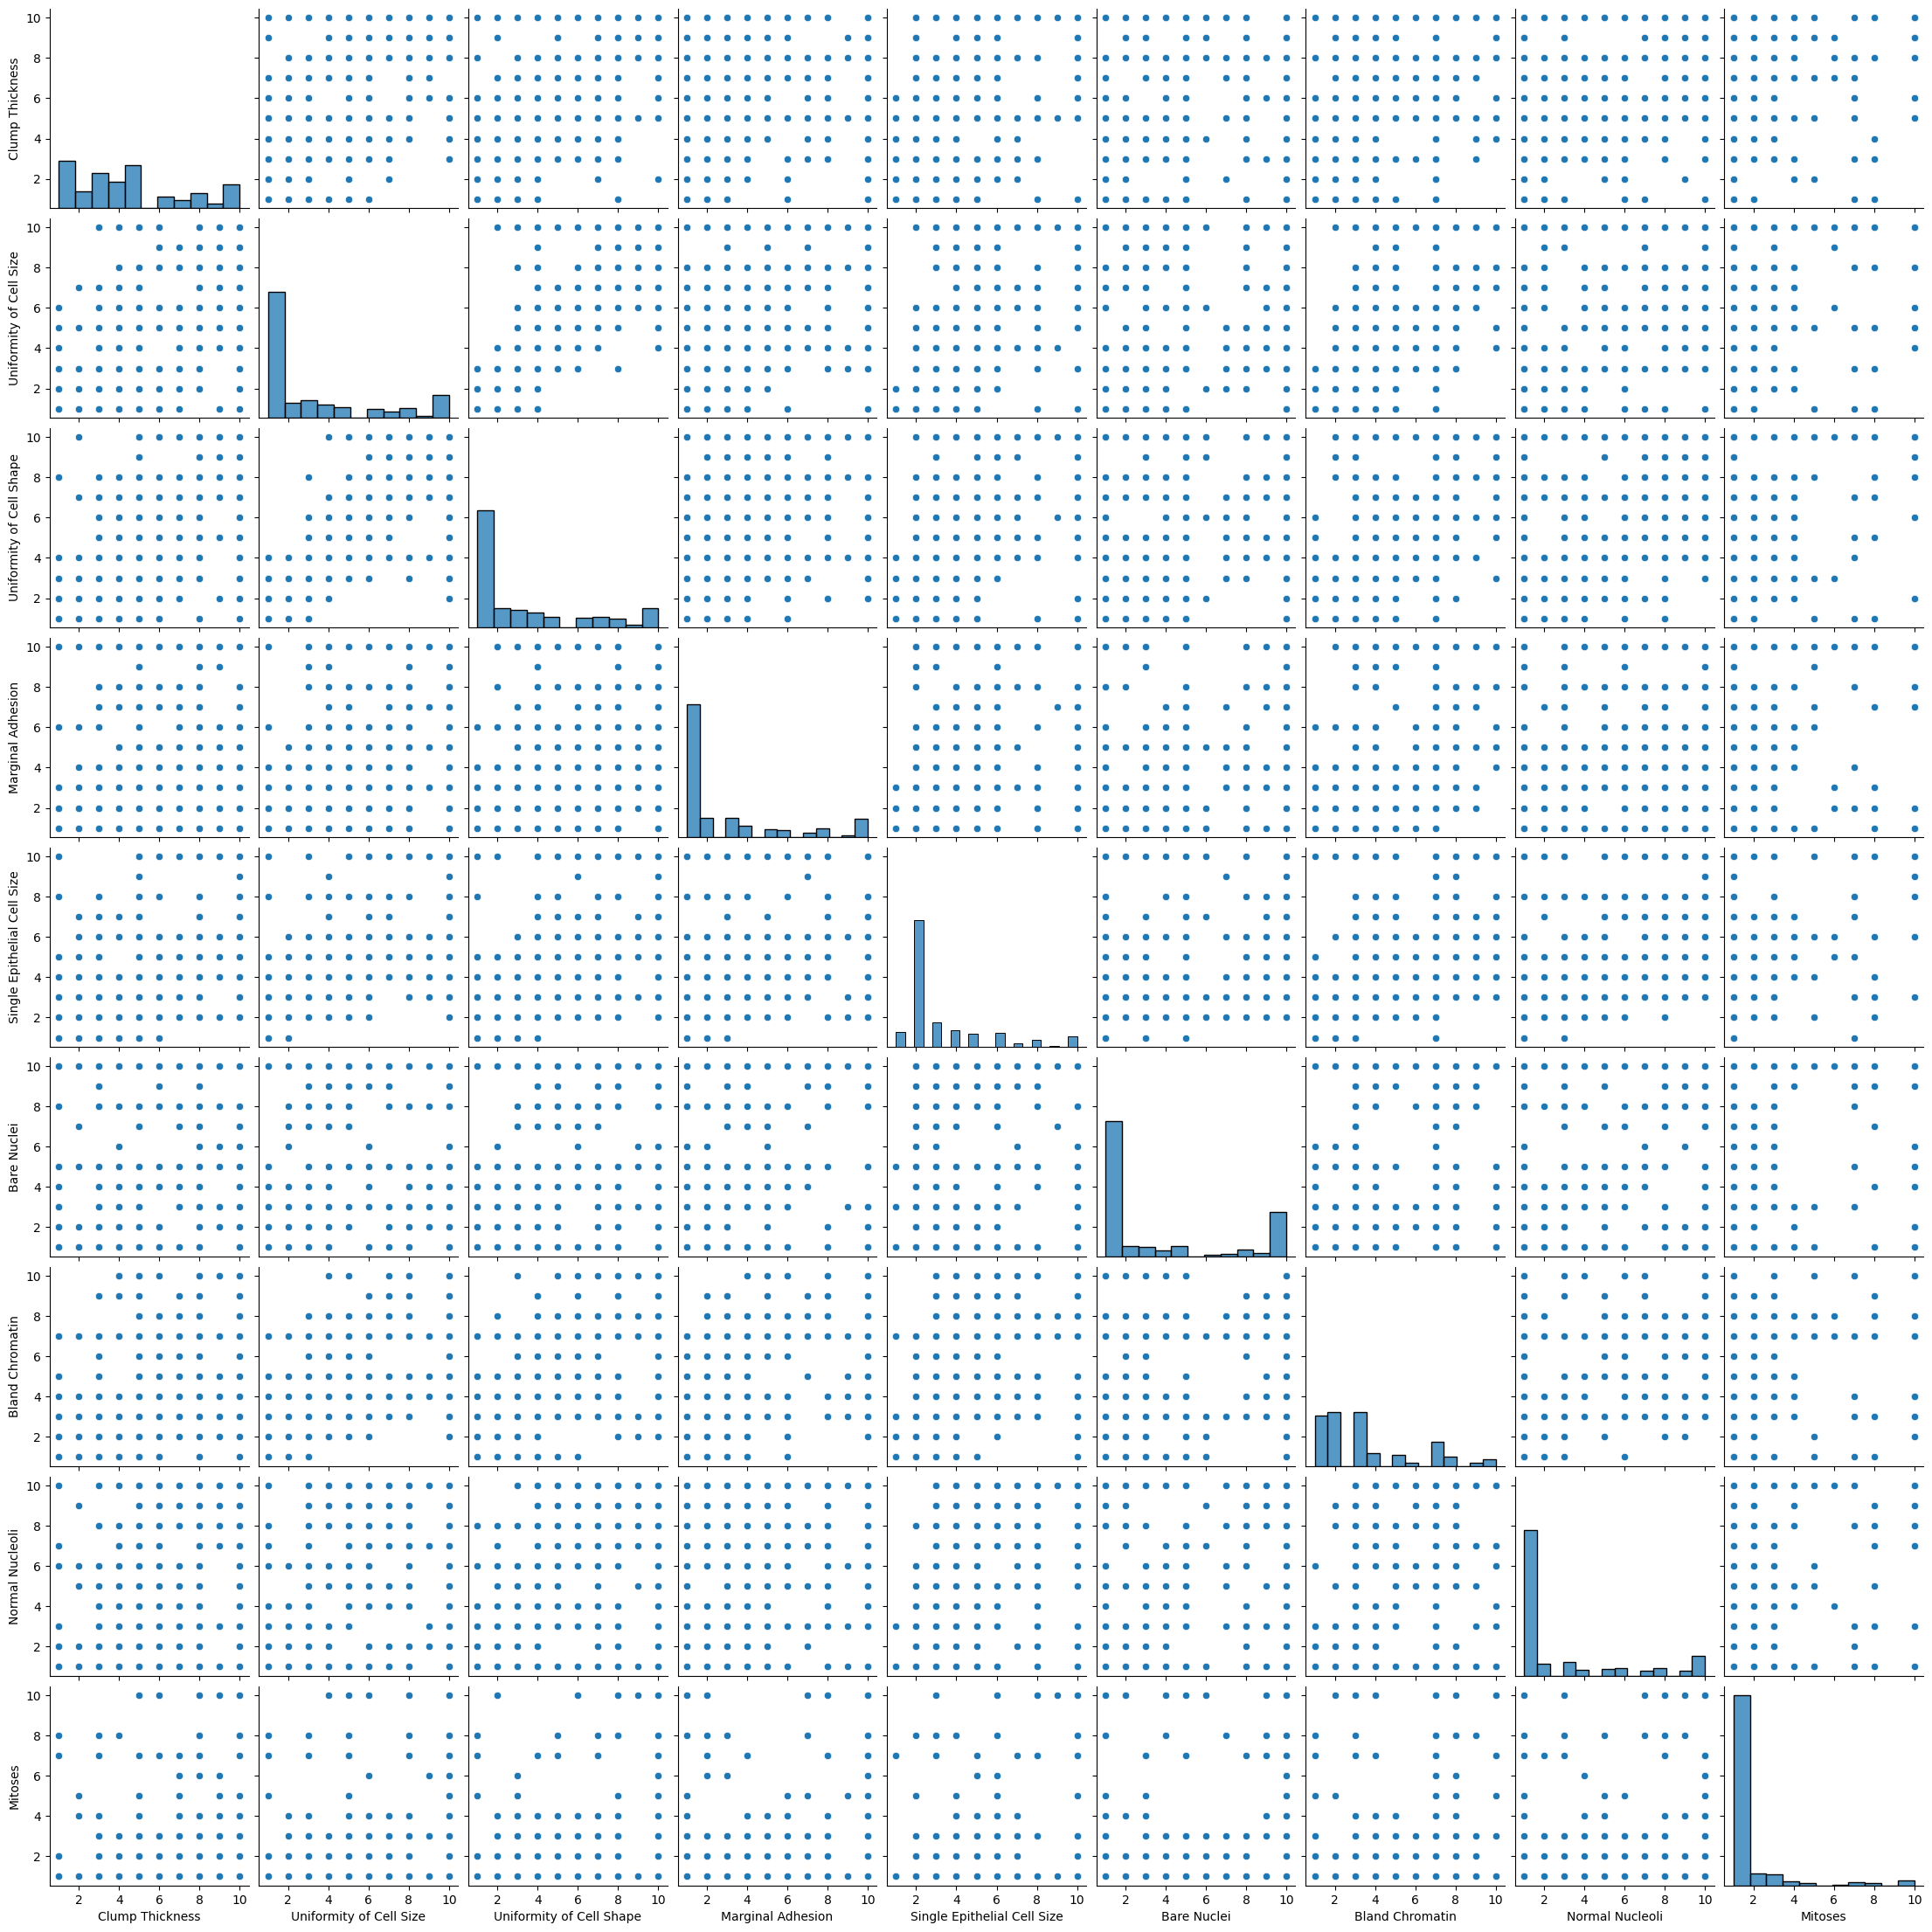

In [100]:
# Create a pairplot using seaborn to visualize pairwise relationships
# between selected features in the dataset
sb.pairplot(data[[
    'Clump Thickness',
    'Uniformity of Cell Size',
    'Uniformity of Cell Shape',
    'Marginal Adhesion',
    'Single Epithelial Cell Size',
    'Bare Nuclei',
    'Bland Chromatin',
    'Normal Nucleoli',
    'Mitoses'
]])

# Display the generated plot
plt.show()

# Checking for Duplicate Records in the Dataset

In [101]:
# Check if there are any duplicate rows in the DataFrame
# Returns True if at least one duplicate exists, otherwise False
data.duplicated().any()

np.True_

# Counting the Number of Duplicate Records

In [102]:
# Count the total number of duplicate rows in the DataFrame
data.duplicated().sum()

np.int64(8)

# Filtering Duplicate Rows in the Dataset

In [103]:
# Select and display all duplicate rows in the DataFrame
data[data.duplicated()]

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
202,1218860,1,1,1,1,1,1,3,1,1,2
245,1100524,6,10,10,2,8,10,7,3,3,4
246,1116116,9,10,10,1,10,8,3,3,1,4
250,1198641,3,1,1,1,2,1,3,1,1,2
264,320675,3,3,5,2,3,10,7,1,1,4
324,704097,1,1,1,1,1,1,2,1,1,2
546,1321942,5,1,1,1,2,1,3,1,1,2
668,466906,1,1,1,1,2,1,1,1,1,2


# Removing Duplicate Records from the Dataset

In [104]:
# Remove all duplicate rows from the DataFrame and update it in-place
data = data.drop_duplicates()

# Checking for Missing Values in Each Column

In [105]:
# Calculate and display the number of missing (null) values in each column of the DataFrame
data.isnull().sum()

,0
Sample code number,0
Clump Thickness,0
Uniformity of Cell Size,0
Uniformity of Cell Shape,0
Marginal Adhesion,0
Single Epithelial Cell Size,0
Bare Nuclei,0
Bland Chromatin,0
Normal Nucleoli,0
Mitoses,0


# Separating Features and Target Variable

In [106]:
# Select all columns except the first and last as features and convert to a NumPy array
X = data.iloc[:, 1:-1].values

# Select the last column as the target variable and convert to a NumPy array
y = data.iloc[:, -1].values

# Splitting Data into Training and Testing Sets

In [107]:
# Import train_test_split function to split the dataset
from sklearn.model_selection import train_test_split

# Split the features and target into training (80%) and testing (20%) sets
# random_state=0 ensures reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling Using StandardScaler

In [108]:
# Import StandardScaler for feature normalization
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
p = StandardScaler()

# Fit the scaler on the training data and transform it to have zero mean and unit variance
X_train = p.fit_transform(X_train)

# Apply the same scaling transformation to the test data
X_test = p.transform(X_test)

# Training a Random Forest Classifier

In [109]:
# Import RandomForestClassifier from sklearn ensemble module
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model with 10 trees and fixed random state for reproducibility
model = RandomForestClassifier(n_estimators=10, random_state=0)

# Train the model on the scaled training data and target labels
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

# Generating and Displaying Confusion Matrix

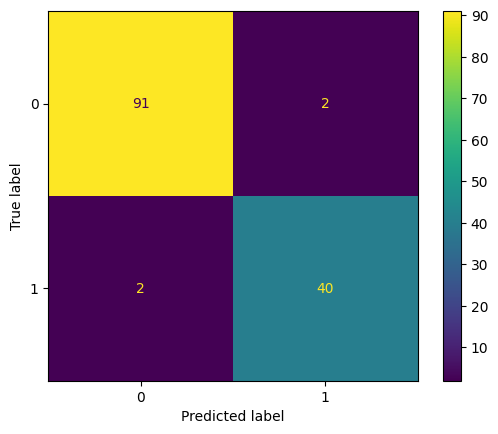

In [110]:
# Import functions to compute and display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Compute confusion matrix comparing actual and predicted labels on the test set
cm = confusion_matrix(y_test, model.predict(X_test))

# Create a ConfusionMatrixDisplay object using the computed matrix
dia = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
dia.plot()

# Calculating and Printing Model Accuracy

In [111]:
# Import accuracy_score to evaluate the model's accuracy
from sklearn.metrics import accuracy_score

# Calculate accuracy by comparing true labels with model predictions on test data
accuracy = accuracy_score(y_test, model.predict(X_test))

# Print the accuracy score
print(accuracy)

0.9703703703703703


# User Input for Tumor Features and Prediction

In [112]:
# Input prompts for each tumor feature (values expected between 1 and 10)
Clump_Thickness = int(input("Enter Clump Thickness (1–10): "))
Uniformity_of_Cell_Size = int(input("Enter Uniformity of Cell Size (1–10): "))
Uniformity_of_Cell_Shape = int(input("Enter Uniformity of Cell Shape (1–10): "))
Marginal_Adhesion = int(input("Enter Marginal Adhesion (1–10): "))
Single_Epithelial_Cell_Size = int(input("Enter Single Epithelial Cell Size (1–10): "))
Bare_Nuclei = int(input("Enter Bare Nuclei (1–10): "))
Bland_Chromatin = int(input("Enter Bland Chromatin (1–10): "))
Normal_Nucleoli = int(input("Enter Normal Nucleoli (1–10): "))
Mitoses = int(input("Enter Mitoses (1–10): "))

# Predict tumor class using the trained model after scaling input features
a = model.predict(p.transform([[Clump_Thickness, Uniformity_of_Cell_Size, Uniformity_of_Cell_Shape,
                                Marginal_Adhesion, Single_Epithelial_Cell_Size, Bare_Nuclei,
                                Bland_Chromatin, Normal_Nucleoli, Mitoses]]))

# Interpret and print the prediction result
if a == 2:
    print("Result: The tumor is **Benign** (non-cancerous).")
else:
    print("Result: The tumor is **Malignant** (cancerous).")

Enter Clump Thickness (1–10): 8
Enter Uniformity of Cell Size (1–10): 3
Enter Uniformity of Cell Shape (1–10): 7
Enter Marginal Adhesion (1–10): 6
Enter Single Epithelial Cell Size (1–10): 8
Enter Bare Nuclei (1–10): 2
Enter Bland Chromatin (1–10): 6
Enter Normal Nucleoli (1–10): 5
Enter Mitoses (1–10): 7
Result: The tumor is **Malignant** (cancerous).
